#Proyecto de HR


En este proyecto, buscamos hacer un análisis exploratorio de los datos de una base de datos donde colectamos la información de más de 14000 empleados de una empresa. En este documento, buscamos predecir la deserción de cientos empleados dependiendo de varias variables.

## Preparación de los datos.

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HR_Dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Cambiamos el nombre de las columnas

In [ ]:
df.rename({'last_evaluation' : 'performance',
                      'Work_accident' : 'number_work_accidents',
                      'left' : 'resign',
                      'Departments ': 'department'}, axis = 'columns', inplace = True)

In [ ]:
df.dtypes

satisfaction_level       float64
performance              float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
number_work_accidents      int64
resign                     int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

Checamos los valores únicos de las variables de clasificación.

In [ ]:
df.resign.unique()

array([1, 0])

In [ ]:
df.number_work_accidents.unique()

array([0, 1])

In [ ]:
df.promotion_last_5years.unique()

array([0, 1])

In [ ]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
df.number_project.unique()

array([2, 5, 7, 6, 4, 3])

Hacemos observaciones de valores nulos. 

Cabe destacar que, debido a la naturaleza de los datos que van de valores entre 0 y 1, es poco probable la presencia de datos nulos, como se observa en la gráfica boxplot a continuación.

In [ ]:
df.isnull().sum()

satisfaction_level       0
performance              0
number_project           0
average_montly_hours     0
time_spend_company       0
number_work_accidents    0
resign                   0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

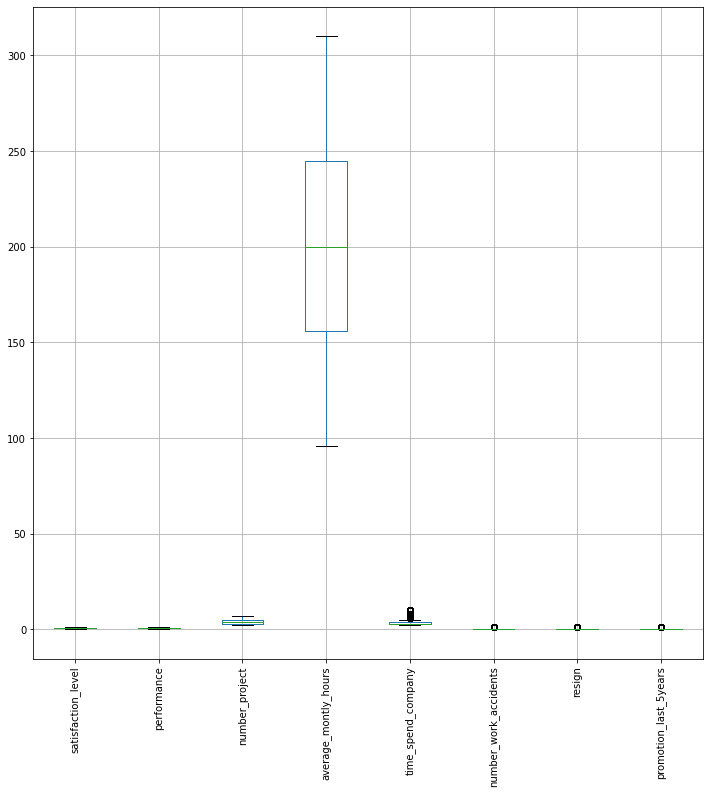

In [ ]:
plt.figure(figsize=(12,12));
df.boxplot(rot=90);

In [ ]:
print(df.duplicated().sum())

3008


In [ ]:
df.drop_duplicates(inplace=True)

## Análisis exploratorio.

Tomando como variable importante la deserción de personal, contamos todos los empleados que han renunciado en los últimos años y lo comparamos con la cantidad de años que tienen los empleados en la empresa.

In [ ]:
df.resign.value_counts()

0    10000
1     1991
Name: resign, dtype: int64

In [ ]:
df.groupby('resign').mean()

,satisfaction_level,performance,number_project,average_montly_hours,time_spend_company,number_work_accidents,promotion_last_5years
resign,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


In [ ]:
years_resign = df.groupby('time_spend_company')['resign'].sum()/df.groupby('time_spend_company')['resign'].count()

In [ ]:
years_resign

time_spend_company
2     0.010653
3     0.168401
4     0.246883
5     0.453861
6     0.201107
7     0.000000
8     0.000000
10    0.000000
Name: resign, dtype: float64

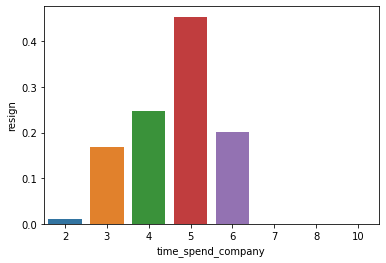

In [ ]:
sns.barplot(x=years_resign.index,y=years_resign)

In [ ]:
years_satisfaction = df.groupby('time_spend_company')['satisfaction_level'].mean()
years_satisfaction

time_spend_company
2     0.699165
3     0.648988
4     0.516090
5     0.583183
6     0.571107
7     0.635957
8     0.665062
10    0.655327
Name: satisfaction_level, dtype: float64

Text(0, 0.5, 'Satisfaction')

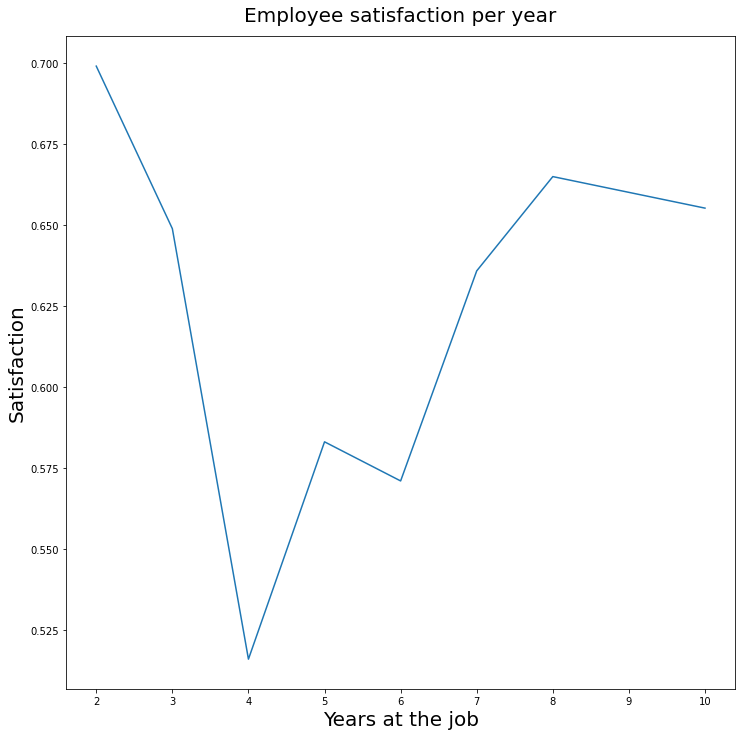

In [ ]:
plt.figure(figsize=(12, 12))
plot_satisfaction = sns.lineplot(x=years_satisfaction.index,y=years_satisfaction);
sns.set(style="white")
plot_satisfaction.set_title('Employee satisfaction per year',  fontsize=20, pad=15);
plot_satisfaction.set_xlabel("Years at the job", fontsize = 20)
plot_satisfaction.set_ylabel("Satisfaction", fontsize = 20)


In [ ]:
salary_resign_count = df.groupby('salary')['resign'].sum()/df.groupby('salary')['resign'].count()
salary_resign_count

salary
high      0.048485
low       0.204530
medium    0.146170
Name: resign, dtype: float64

In [ ]:
years_performance = df.groupby('time_spend_company')['performance'].mean()


Text(0, 0.5, 'Performance')

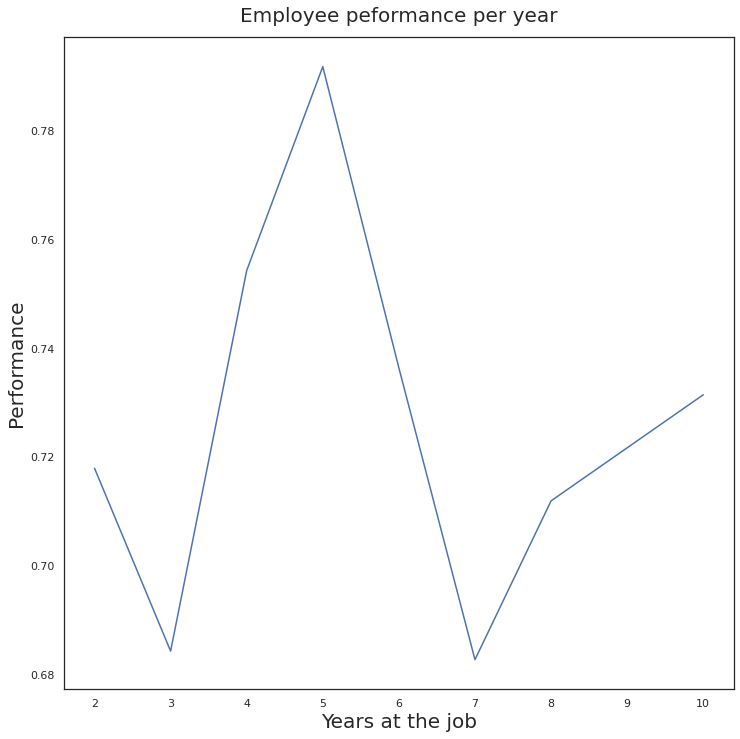

In [ ]:
plt.figure(figsize=(12, 12))
plot_satisfaction = sns.lineplot(x=years_performance.index,y=years_performance);
sns.set(style="white")
plot_satisfaction.set_title('Employee peformance per year',  fontsize=20, pad=15);
plot_satisfaction.set_xlabel("Years at the job", fontsize = 20)
plot_satisfaction.set_ylabel("Performance", fontsize = 20)

In [ ]:
department_satisfaction = df.groupby('department')['satisfaction_level'].mean()
department_satisfaction

department
IT             0.634016
RandD          0.627176
accounting     0.607939
hr             0.621947
management     0.631995
marketing      0.634770
product_mng    0.629825
sales          0.631349
support        0.634822
technical      0.627937
Name: satisfaction_level, dtype: float64

In [ ]:
department_performance = df.groupby('department')['performance'].mean()
department_performance

department
IT             0.715051
RandD          0.712983
accounting     0.721900
hr             0.715691
management     0.726307
marketing      0.718440
product_mng    0.713790
sales          0.710398
support        0.722998
technical      0.719791
Name: performance, dtype: float64

In [ ]:
department_resign = (df.groupby('department')['resign'].sum()/df.groupby('department')['resign'].count()).sort_values(ascending = True)
department_resign

department
management     0.119266
RandD          0.122478
product_mng    0.160350
IT             0.161885
marketing      0.166419
sales          0.169805
support        0.171334
technical      0.173797
accounting     0.175523
hr             0.188020
Name: resign, dtype: float64

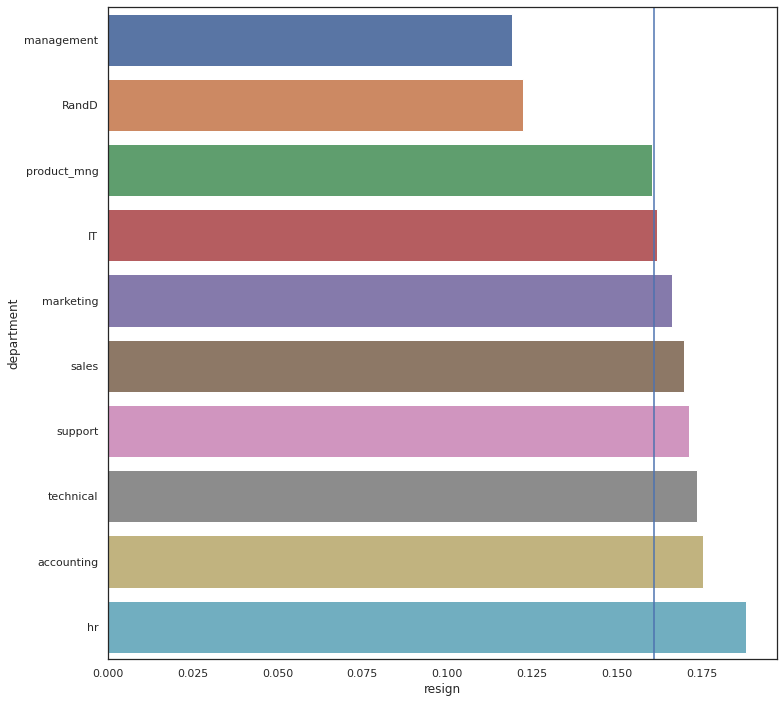

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(y=department_resign.index,x=department_resign)
plt.axvline(x=department_resign.mean())

In [ ]:
hours_department = df.groupby('department')[('average_montly_hours','salary')].mean()
hours_department

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,average_montly_hours
department,
IT,200.638320
RandD,201.291066
accounting,200.877617
hr,199.371048
management,201.529817
marketing,199.487370
product_mng,198.893586
sales,200.242050
support,200.627128


In [ ]:
hours_department = pd.crosstab(df['department'], df['salary'])
hours_department

salary,high,low,medium
department,,,
IT,71,476,429
RandD,47,322,325
accounting,63,296,262
hr,38,296,267
management,128,139,169
marketing,62,310,301
product_mng,52,343,291
sales,237,1553,1449
support,126,867,828


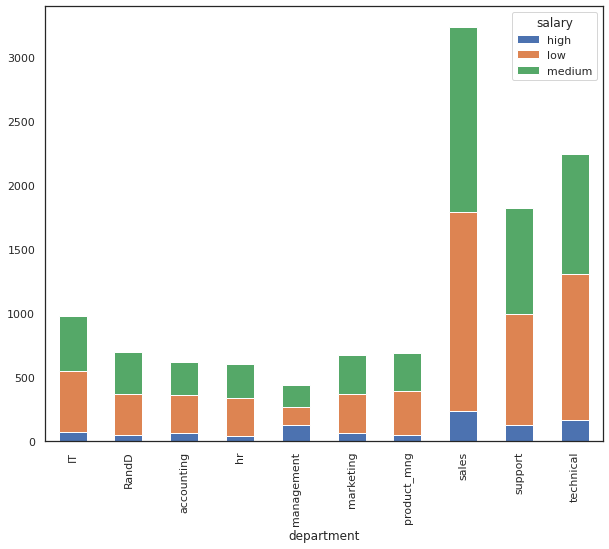

In [ ]:
figure_stacked = plt.figure(figsize=(10,8))
ax = figure_stacked.add_subplot()
plot_stacked = hours_department.plot(kind='bar', stacked=True, ax=ax)

In [ ]:
accident_department = (df.groupby('department')['number_work_accidents'].sum()/df.groupby('department')['number_work_accidents'].count()).sort_values(ascending=True)
accident_department

department
hr             0.133111
accounting     0.140097
IT             0.142418
technical      0.151070
sales          0.153751
product_mng    0.158892
marketing      0.160475
support        0.164195
management     0.165138
RandD          0.171470
Name: number_work_accidents, dtype: float64

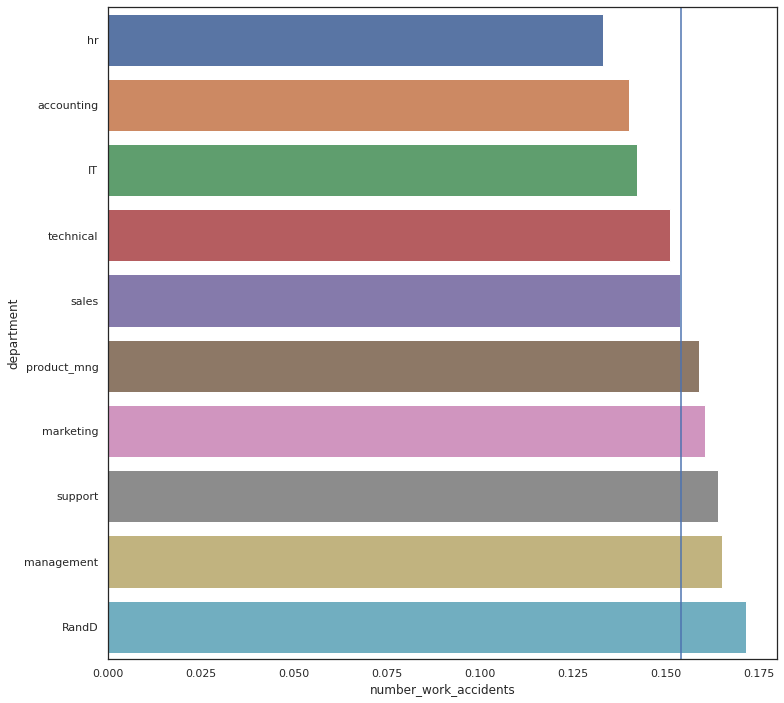

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(y=accident_department.index,x=accident_department)
plt.axvline(x=accident_department.mean())

In [ ]:
salary_projects = df.groupby('salary')['number_project'].sum()/df['number_project'].sum()
salary_projects

salary
high      0.082325
low       0.478553
medium    0.439123
Name: number_project, dtype: float64

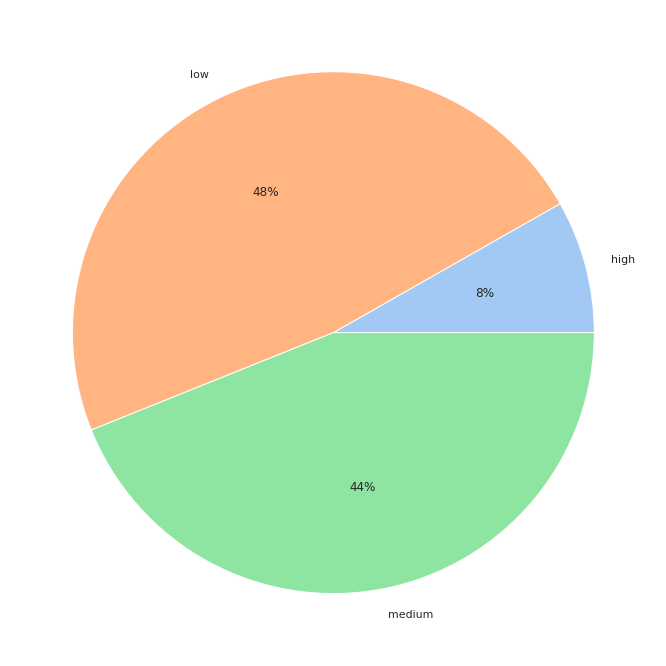

In [ ]:
plt.figure(figsize=(12, 12))
colors = sns.color_palette('pastel')[0:3]
labels = salary_projects.index
plt.pie(salary_projects, labels = labels, colors = colors, autopct='%1.0f%%');
plt.show()

In [ ]:
salary_promotion = df.groupby('salary')['promotion_last_5years'].sum()/df['promotion_last_5years'].sum()
salary_promotion

salary
high      0.216749
low       0.187192
medium    0.596059
Name: promotion_last_5years, dtype: float64

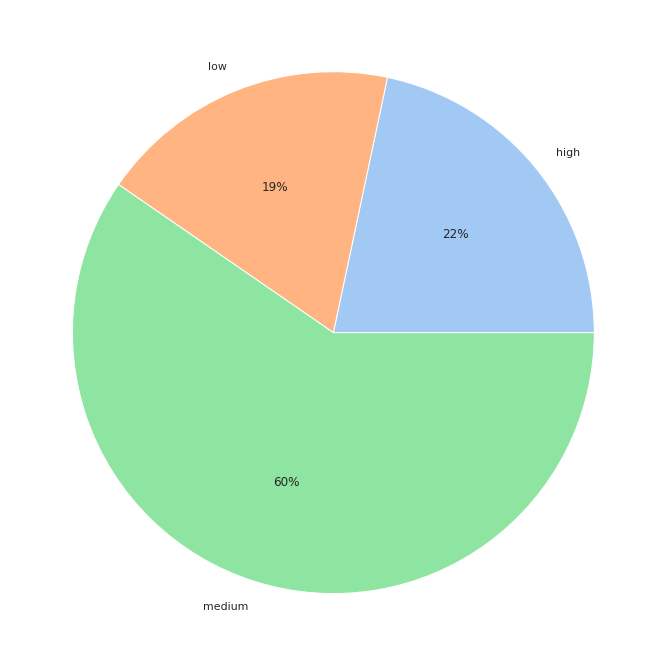

In [ ]:
plt.figure(figsize=(12, 12))
colors = sns.color_palette('pastel')[0:3]
labels = salary_promotion.index
plt.pie(salary_promotion, labels = labels, colors = colors, autopct='%1.0f%%');
plt.show()

## Machine Learning

In [ ]:
from sklearn.metrics import confusion_matrix

def calcular_precision(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

def calcular_sensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcular_especificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar_modelo(y_test, y_pred):
  matrix = confusion_matrix(y_test, y_pred)
  (TN, FP, FN, TP) = matrix.ravel()

  print(f"Precisión: {calcular_precision(TP, TN, FP, FN)}")
  print(f"Sensibilidad: {calcular_sensibilidad(TP, TN, FP, FN)}")
  print(f"Especificidad: {calcular_especificidad(TP, TN, FP, FN)}")

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_processed = df.copy()

In [ ]:
df_processed['salary'] = le.fit_transform(df_processed['salary'])
df_processed['department'] = le.fit_transform(df_processed['department'])
df_processed.head()

,satisfaction_level,performance,number_project,average_montly_hours,time_spend_company,number_work_accidents,resign,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [ ]:
df['resign'].value_counts()

0    10000
1     1991
Name: resign, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_processed.drop(columns='resign')
y = df_processed['resign']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred = random_forest.predict(X_test)

In [ ]:
eval_rf = evaluar_modelo(y_test, y_pred)
eval_rf

Precisión: 98.49916620344636
Sensibilidad: 92.6829268292683
Especificidad: 99.69829031176668


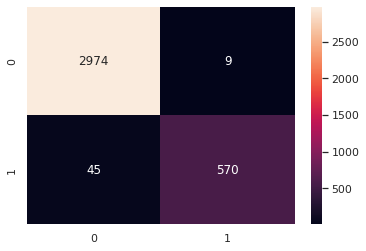

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [ ]:
evaluar_modelo(y_test, y_pred)

Precisión: 82.90717065036132
Sensibilidad: 0.0
Especificidad: 100.0


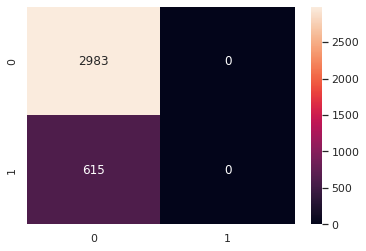

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB

In [ ]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred = gaussian_nb.predict(X_test)

In [ ]:
y_pred = gaussian_nb.predict(X_test)

In [ ]:
evaluar_modelo(y_test, y_pred)

Precisión: 85.10283490828238
Sensibilidad: 68.29268292682927
Especificidad: 88.56855514582634


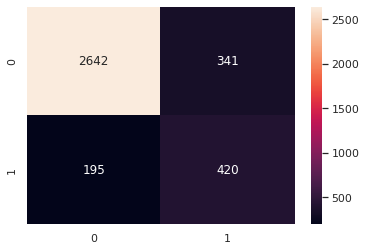

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [ ]:
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)
y_pred = bernoulli_nb.predict(X_test)

In [ ]:
y_pred = bernoulli_nb.predict(X_test)

In [ ]:
evaluar_modelo(y_test, y_pred)

Precisión: 82.90717065036132
Sensibilidad: 0.0
Especificidad: 100.0


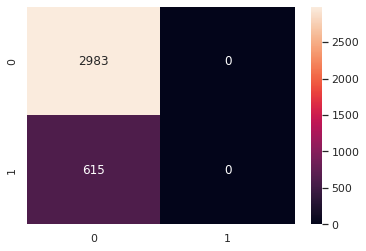

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [ ]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train, y_train)
y_pred = multinomial_nb.predict(X_test)

In [ ]:
y_pred = multinomial_nb.predict(X_test)

In [ ]:
evaluar_modelo(y_test, y_pred)

Precisión: 82.90717065036132
Sensibilidad: 0.0
Especificidad: 100.0


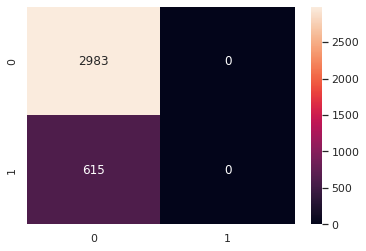

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [ ]:
categorical_nb = CategoricalNB()
categorical_nb.fit(X_train, y_train)
y_pred = categorical_nb.predict(X_test)

In [ ]:
y_pred = categorical_nb.predict(X_test)

In [ ]:
evaluar_modelo(y_test, y_pred)

Precisión: 92.16231239577543
Sensibilidad: 71.869918699187
Especificidad: 96.34596044250753


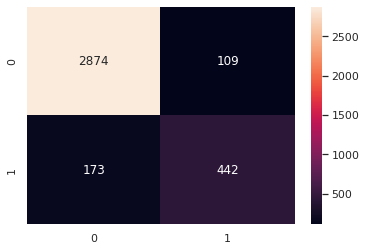

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

In [ ]:
l0 = tf.keras.layers.Dense(units=32, input_shape=([X.shape[1]]), activation="sigmoid")
l1 = tf.keras.layers.Dense(units=64, activation="relu")
l2 = tf.keras.layers.Dense(units=16, activation="relu")
l3 = tf.keras.layers.Dense(units=8, activation="relu")
l4 = tf.keras.layers.Dense(units=1)

In [ ]:
model = tf.keras.Sequential([l0, l1, l2, l3, l4])

In [ ]:
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001), metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, verbose=True, validation_split=0.1)

Epoch 1/100
237/237 [==============================] - 1s 3ms/step - loss: 0.1543 - accuracy: 0.8364 - val_loss: 0.1375 - val_accuracy: 0.8333
Epoch 2/100
237/237 [==============================] - 1s 2ms/step - loss: 0.1338 - accuracy: 0.8364 - val_loss: 0.1358 - val_accuracy: 0.8333
Epoch 3/100
237/237 [==============================] - 1s 2ms/step - loss: 0.1266 - accuracy: 0.8364 - val_loss: 0.1211 - val_accuracy: 0.8333
Epoch 4/100
237/237 [==============================] - 1s 2ms/step - loss: 0.1195 - accuracy: 0.8387 - val_loss: 0.1118 - val_accuracy: 0.8381
Epoch 5/100
237/237 [==============================] - 1s 2ms/step - loss: 0.1082 - accuracy: 0.8513 - val_loss: 0.0993 - val_accuracy: 0.8583
Epoch 6/100
237/237 [==============================] - 1s 2ms/step - loss: 0.0955 - accuracy: 0.8597 - val_loss: 0.0891 - val_accuracy: 0.8655
Epoch 7/100
237/237 [==============================] - 1s 2ms/step - loss: 0.0867 - accuracy: 0.8736 - val_loss: 0.1064 - val_accuracy: 0.8548

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([[ 0.01396127],
       [ 0.06877948],
       [ 0.2579491 ],
       ...,
       [-0.01179114],
       [-0.00981188],
       [-0.01237065]], dtype=float32)

In [ ]:
y_pred_01 = []

for num in y_pred:
  if num[0] < 0.5:
    y_pred_01.append(0)
  else:
    y_pred_01.append(1)

In [ ]:
evaluar_modelo(y_test, y_pred_01)

Precisión: 96.08115619788772
Sensibilidad: 90.2439024390244
Especificidad: 97.28461280590011


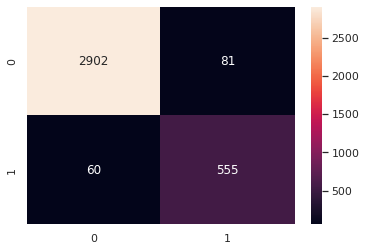

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_01), annot=True, fmt="d")

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(max_iter = 1000)

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
evaluar_modelo(y_test, y_pred)

Precisión: 83.24068927181769
Sensibilidad: 21.463414634146343
Especificidad: 95.97720415688904


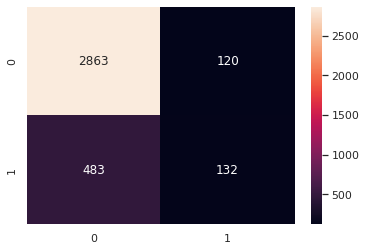

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

SMOTE = SMOTE()
random_under_sampler = RandomUnderSampler(sampling_strategy='majority')

In [ ]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model=SVC()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)

In [ ]:
evaluar_modelo(y_test, pred_SMOTE)

Precisión: 69.62201222901612
Sensibilidad: 73.4959349593496
Especificidad: 68.82333221589005


In [ ]:
random_forest = RandomForestClassifier(n_estimators=200)
rf_SMOTE = random_forest.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = rf_SMOTE.predict(X_test)

In [ ]:
evaluar_modelo(y_test, pred_SMOTE)

Precisión: 97.80433574207893
Sensibilidad: 92.84552845528455
Especificidad: 98.8266845457593


In [ ]:
X_train_RUS, y_train_RUS = random_under_sampler.fit_resample(X_train, y_train)

In [ ]:
model=SVC()
clf_RUS = model.fit(X_train_RUS, y_train_RUS)
pred_RUS = clf_RUS.predict(X_test)

In [ ]:
evaluar_modelo(y_test, pred_RUS)

Precisión: 67.75986659255142
Sensibilidad: 65.52845528455285
Especificidad: 68.2199128394234


In [ ]:
random_forest = RandomForestClassifier(n_estimators=200)
rf_RUS = random_forest.fit(X_train_RUS, y_train_RUS)
pred_rus = rf_RUS.predict(X_test)

In [ ]:
evaluar_modelo(y_test, pred_rus)

Precisión: 97.88771539744302
Sensibilidad: 93.33333333333333
Especificidad: 98.8266845457593


In [ ]:
logreg = LogisticRegression(max_iter = 1000)

In [ ]:
logreg.fit(X_train_RUS, y_train_RUS)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_RUS = logreg.predict(X_test)

In [ ]:
evaluar_modelo(y_test, y_pred_RUS)

Precisión: 78.04335742078933
Sensibilidad: 83.41463414634146
Especificidad: 76.93597049949716
